## 词云 WordCloud
下文以新冠疫情2020.01~2020.06部分疫情相关的微博评论样本为例

In [1]:
import numpy 
import numpy  as np
import codecs
import pandas
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 1. 文本加载及数据预处理

In [2]:
# -*- coding: utf-8 -*-
file = codecs.open("data\疫情主题2020\X_yiqing.txt", 'r', 'utf-8')  # X_yiqing 样本已为预处理、分词后样本
content = file.read()
file.close()  ##释放内存

In [4]:
import jieba
#中文分词
segments = []
segs = jieba.cut(content) ##当成长句整体  cut分词
for seg in segs:
     if len(seg)>1: ##长度大于一的要求 可以去掉单个字以及标点符号
             segments.append(seg)

segmentDF = pandas.DataFrame({'segment':segments})

In [5]:
segmentDF = segmentDF[~segmentDF['segment'].isin(['\r\n','Txt','http','www','dxsxs','com',u'网站',u'下载',u'本站',
                                                  '2020.01','2020.02','3003','0612','20','##','12','30','24'])]

In [6]:
print(segmentDF.shape)
print(segmentDF.head(20))

(1648852, 1)
   segment
0       江苏
1       新增
2       新冠
3       肺炎
4       江苏
5       幸免
6       求求
7       嫌疑
8       乱窜
9       感染
11     武汉市
12      新冠
13      肺炎
14      防控
15     指挥部
16      发布
17      通告
18      范围
19      病毒
20      途径


#### 高频词统计

In [7]:
segStat = segmentDF.groupby(by=["segment"] )["segment"].agg(["count"]).reset_index().sort_values(by="count", ascending=False)
                                                    ##agg=count（计数）方式                                  ##升序=False（降序）
segStat.head(20)

,segment,count
30957,新冠,73095
51742,肺炎,44612
44357,疫情,38857
44541,病毒,21727
46470,确诊,18026
44476,病例,16293
50628,美国,14710
55545,视频,14295
1414,中国,13469
63541,防控,12184


### 2. 绘制词云

In [8]:
segList=segStat.values.tolist()
segTuple=tuple(segList[:150]) ##转成元组  只取前100
segDict ={k:v*1.0 for k,v in segTuple } ##v*1.0防止参数格式出错
#segDict 

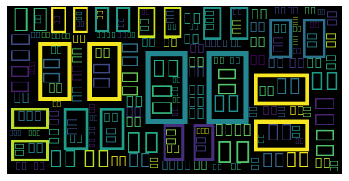

{'新冠': 1.0, '肺炎': 0.6103290238730419, '疫情': 0.5315958683904508, '病毒': 0.29724331349613514, '确诊': 0.24661057527874683, '病例': 0.2229017032628771, '美国': 0.20124495519529378, '视频': 0.1955674122717012, '中国': 0.18426704972980368, '防控': 0.16668718790614953, '感染': 0.16178945208290582, '工作': 0.13895615295163827, '医院': 0.11602708803611739, '武汉': 0.11210069088172926, '微博': 0.10230521923524181, '全球': 0.0970244202749846, '新闻': 0.0911690266092072, '新增': 0.08740679937068199, '链接': 0.08538203707503933, '检测': 0.08502633559066967, '网页': 0.08268691428962309, '国家': 0.08148300157329502, '死亡': 0.07915726109857035, '时间': 0.07777549764005746, '口罩': 0.07774813598741363, '累计': 0.07677679731855803, '隔离': 0.07557288460222998, '目前': 0.07067514877898626, '新型': 0.0686640673096655, '疫苗': 0.06785689855667282, '治疗': 0.0665709008824133, '进行': 0.06473767015527739, '发布': 0.06372528900745605, '表示': 0.06183733497503249, '冠状病毒': 0.05955263697927355, '出现': 0.05217867159176414, '出院': 0.0521102674601546, '抗击': 0.049073124016690

In [9]:
# # 版式预览
# #-*- coding: utf-8 -*-
# %matplotlib inline
# #%matplotlib notebook

# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# wordcloud = WordCloud().fit_words(segDict) ##word cloud只接受字典格式
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()
# plt.close()

# print(wordcloud.words_)   #可查看词云依赖的词及其数值
# #for k,v in wordcloud.words_.items():print k,v 

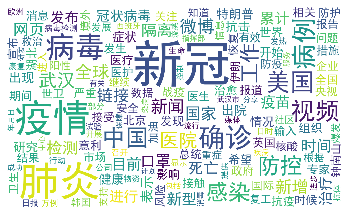

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#不设置font_path，并制定一个中文字体则无法显示中文，例如 font_path= 'data/simhei.ttf'  msyh.ttc
# max_font_size：最大字体大小， max_words：取N个高频词绘制词云
wordcloud = WordCloud(width=1000,height=600,background_color='white',
                      font_path="simhei.ttf",max_font_size=150,max_words=150,relative_scaling=.5).fit_words(segDict)
                    ##字体路径 
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("output/wordcloud_yiqing.png")
plt.show()
plt.close()

#### 自定义图片背景词云

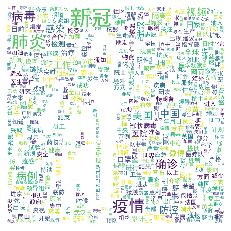

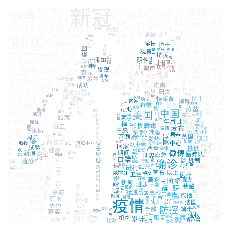

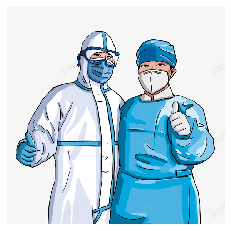

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image  ##注意安装的是pillow

pic_coloring = np.array(Image.open("data/疫情主题2020/医护人员图片.jpg"))
wc = WordCloud(font_path = 'simhei.ttf',background_color="white", max_words=500, mask=pic_coloring,stopwords=STOPWORDS,
               max_font_size=60, random_state=42)                                 

segTuple=tuple(segList[:500])
segDict ={k:v*1.0 for k,v in segTuple }

wc.fit_words(segDict)

# create coloring from image
image_colors = ImageColorGenerator(pic_coloring)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
plt.imshow(pic_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

plt.close()